In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [39]:
df=pd.read_csv('C:\\Users\\Goksun\\Downloads\\heart.csv')
df=df.iloc[:300]

In [40]:
X = df.iloc[:,:13]
y = df.iloc[:, 13]

In [41]:
scaler=StandardScaler()
X_std=scaler.fit_transform(X)

Answer 1

In [42]:
gmm=GaussianMixture(n_components=2,random_state=123)
clusters=gmm.fit_predict(X_std)

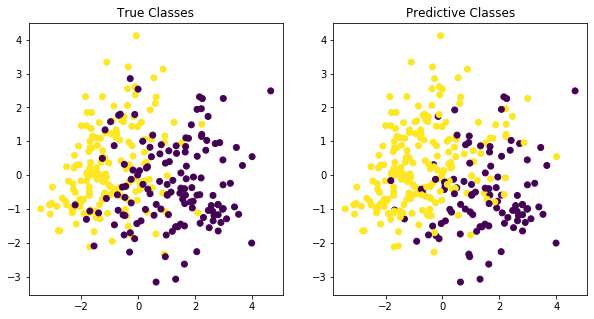

In [43]:
pca = PCA(n_components=2).fit_transform(X_std)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(pca.T[0],pca.T[1],c=y)
plt.title('True Classes')
plt.subplot(122)
plt.scatter(pca.T[0],pca.T[1],c=clusters)
plt.title('Predictive Classes')
plt.show()

In [44]:
print('ARI Score of GMM: {}'.format(metrics.adjusted_rand_score(y,clusters)))

ARI Score of GMM: 0.19620356794819918


In [45]:
print('Silhouette Score of GMM: {}'.format(metrics.silhouette_score(X_std,clusters,metric='euclidean')))

Silhouette Score of GMM: 0.13591165397661067


ARI Score of Kmeans algorithm was 0.25 and Silhouette Score was 0.14. According to benchmarking of scores, we can say Kmeans is better from GMM. DBSCAN is the worst of all for ARI Score that is about zero. But for Silhouette Score(0.03) DBSCAN is the best.

Answer 2

In [47]:
parameter=['full','tied','diag','spherical']
for j,i in enumerate(parameter):
    gmm=GaussianMixture(n_components=2,covariance_type=i,random_state=123)
    clusters=gmm.fit_predict(X_std)
    print('ARI Score for        {}: {:.4f}'.format(i,metrics.adjusted_rand_score(y,clusters)))
    print('Silhouette Score for {}: {:.4f}'.format(i,metrics.silhouette_score(X_std,clusters,metric='euclidean')))

ARI Score for        full: 0.1962
Silhouette Score for full: 0.1359
ARI Score for        tied: 0.1962
Silhouette Score for tied: 0.1359
ARI Score for        diag: 0.1962
Silhouette Score for diag: 0.1359
ARI Score for        spherical: 0.1791
Silhouette Score for spherical: 0.1071


Spherical is covariance matrix type that performs the best clustering according to ARI Score but We can not say this for Silhouette Score.